# Welcome to your first AI game!


Let's create the environment!

In [0]:
# --STEP 0--
# Import and initialize Mountain Car Environment
import gym
import numpy as np
import matplotlib.pyplot as plt

env=gym.make('MountainCar-v0')
env.reset()


array([-0.56973426,  0.        ])

Set the given variables and then discretize the range of position(num_states[0]) and velocity(num_states[1]) and print the size of bins/discete values.

In [0]:
# --STEP 1--

# Set the variables
learning = 0.2
discount = 0.9
epsilon = 0.8
min_eps = 0 
episodes = 5000

# Determine size of discretized state space

num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1


NameError: ignored

Create 2 empty tables for Reward & Avg. Reward and Initialize Q-Table with random values


In [0]:
# --STEP 2--

# Initialize variables to track rewards
reward_list = []
ave_reward_list = []

# Initialize Q table
Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
Q



array([[[ 0.50597469, -0.15277652, -0.08132633],
        [ 0.7740162 ,  0.74237073,  0.3750678 ],
        [-0.06701523, -0.44418935,  0.29578626],
        [ 0.68930664,  0.24909848,  0.60543706],
        [-0.9000908 ,  0.95884576,  0.8723169 ],
        [ 0.81813443,  0.88081265, -0.64313464],
        [-0.89541605,  0.27570218, -0.30215465],
        [-0.92137078,  0.56366501, -0.61883601],
        [ 0.28487074, -0.01431107,  0.40935237],
        [-0.32583167,  0.49994991,  0.61274514],
        [-0.19966962,  0.13081559, -0.64866733],
        [-0.17013438, -0.50681337, -0.25033232],
        [ 0.40284063,  0.82380948,  0.94126326],
        [ 0.01907749, -0.27088948,  0.76325881],
        [ 0.56380489, -0.33841703, -0.2761746 ]],

       [[-0.6380372 ,  0.72278498, -0.83962031],
        [-0.00923101, -0.33346486,  0.18037734],
        [-0.9624426 ,  0.63725386, -0.28287162],
        [-0.44059438,  0.39084463,  0.51593552],
        [-0.12552956,  0.91150192,  0.98061155],
        [ 0.995237

Apply the Q-Learning algorithm for 1 episode:

In [0]:
# --STEP 3--

# Initialize parameters (done,state,rewards)
done = False
tot_reward, reward = 0,0
state = env.reset()  
        
        
# Discretize state
state_adj = (state - env.observation_space.low)*np.array([10, 100])
state_adj = np.round(state_adj, 0).astype(int)



            

Create the loop in order to move the car.

In [0]:
# --STEP 4--

#Create a loop that is terminated when the game is won
#MAKE SURE THAT YOUR CODE IS ALLIGNED CORRECTLY 

while done != True:   
        
    # Render environment
    env.render()
            
                
    # Determine next action - epsilon greedy strategy
    if np.random.random() < 1 - epsilon:
           action = np.argmax(Q[state_adj[0], state_adj[1]]) 
    else:
           action = np.random.randint(0, env.action_space.n)
                
    # Get next state and reward
    state2, reward, done, info = env.step(action)
            
            
    # Discretize new state
    state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
    state2_adj = np.round(state2_adj, 0).astype(int)

            
    #Allow for terminal states
    if done and state2[0] >= 0.5:
          Q[state_adj[0], state_adj[1], action] = reward
            
        
    # Adjust Q value for current state / Apply the Q-Learning function
    else:
          Q[state_adj[0], state_adj[1], action] = (1-learning) *Q[state_adj[0], state_adj[1], action] +learning * (reward + discount*Q[state2_adj[0], state2_adj[1],np.argmax(Q[state2_adj[0], state2_adj[1]]) ])
    
                
            
              
    # Update variables
    tot_reward += reward
    state_adj = state2_adj

#Close the environment after the loop    
env.close()

After creating successfully the code for a single episode, you are now ready to insert your code in a loop for many episodes so that the mountain car can learn how to win through the Q-Learning algorithm!

In [0]:
# --STEP 5--

# Calculate episodic reduction in epsilon
reduction = (epsilon - min_eps)/1000


#Create the loop for the episodes assigned in the beginning of the code and put inside the code from STEP 3 
#AND STEP 4 but now close the environment at the end of for loop and
#Rememer to render the environment every 200 episode this time


#MAKE SURE THAT YOUR CODE IS ALLIGNED CORRECTLY 


for i in range(episodes):
    # Initialize parameters (done,state,rewards)
    done = False
    tot_reward, reward = 0,0
    state = env.reset()  
        
        
    # Discretize state
    state_adj = (state - env.observation_space.low)*np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
        
    
        
    
    while done != True:   
        
        # Render environment
        if (i+1)%200 == 0:
            env.render()
            
                
        # Determine next action - epsilon greedy strategy
        if np.random.random() < 1 - epsilon:
               action = np.argmax(Q[state_adj[0], state_adj[1]]) 
        else:
               action = np.random.randint(0, env.action_space.n)
                
        # Get next state and reward
        state2, reward, done, info = env.step(action)
            
            
        # Discretize new state
        state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
        state2_adj = np.round(state2_adj, 0).astype(int)

            
        #Allow for terminal states
        if done and state2[0] >= 0.5:
              Q[state_adj[0], state_adj[1], action] = reward
                
        
        # Adjust Q value for current state / Apply the Q-Learning function
        else:
              Q[state_adj[0], state_adj[1], action] = (1-learning) *Q[state_adj[0], state_adj[1], action] +learning * (reward + discount*Q[state2_adj[0], state2_adj[1],np.argmax(Q[state2_adj[0], state2_adj[1]]) ])
    
                
            
              
        # Update variables
        tot_reward += reward
        state_adj = state2_adj
        
    # Inside the for loop you need to decay epsilon
    if epsilon > min_eps:
        epsilon -= reduction
        
    # Track rewards
    reward_list.append(tot_reward)
        
    if (i+1) % 100 == 0:
        ave_reward = np.mean(reward_list)
        ave_reward_list.append(ave_reward)
        print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
        reward_list = []
            
     
        
  


 #After creating the loop remember to CLOSE the environment of mountain car
env.close()
    



Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -199.67
Episode 300 Average Reward: -199.5
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -194.94
Episode 600 Average Reward: -197.1
Episode 700 Average Reward: -198.8
Episode 800 Average Reward: -178.36
Episode 900 Average Reward: -186.24
Episode 1000 Average Reward: -184.68


Evaluate how well our code responses through plotting the Average Reward dependent upon episode

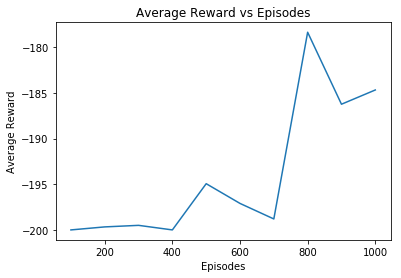

In [0]:
# --STEP 6--

# Plot Rewards

plt.plot(100*(np.arange(len(ave_reward_list)) + 1), ave_reward_list)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()


# Good job, your car made it to the top!!